# **REDDIT DATA ANALYSIS**

For this project I have extracted data of askscience and everythingscience subreddits from 10-10-2023 to 30-10-2023 using official python reddit api wrapper(PRAW). Due to recent policy changes at reddit, access to pushshift api which was widely used for data extraction of reddit for research purposes have been limited to the mods of subreddits.
The reason why I chose these subreddits are
- Both subreddits are on same topic i.e. science but with different targets. While askscience contains interesting questions, everythingscience mostly contains informational content often taken from highly acclaimed news and research articles.
- Both subreddits gives contributors option to add Flairs which are really useful to distinguish different topics asked in questions.
- Although there is a huge difference in number of subscribers, the upvotes and comments are present in similar a range.

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [135]:
#loading csv files in dataframe
df_askscience = pd.read_csv('askscience.csv')
df_everythingscience = pd.read_csv('everythingscience.csv')

## **DATA CLEANING**

In [136]:
df_askscience.shape

(400, 7)

In [137]:
df_everythingscience.shape

(929, 7)

In [138]:
df_askscience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            400 non-null    object 
 1   Created       400 non-null    object 
 2   Flair         391 non-null    object 
 3   Upvotes       400 non-null    int64  
 4   Comments      400 non-null    int64  
 5   Upvote_Ratio  400 non-null    float64
 6   Crossposts    400 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


In [139]:
df_everythingscience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            929 non-null    object 
 1   Created       929 non-null    object 
 2   Flair         745 non-null    object 
 3   Upvotes       929 non-null    int64  
 4   Comments      929 non-null    int64  
 5   Upvote_Ratio  929 non-null    float64
 6   Crossposts    929 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 50.9+ KB


### ABOUT DATA SELECTION
The 5 metrics used in this project to understand productivity of reddit contributors are
- Flair :- A flair is a tag which shows others what the post is about. For example, a physics flair would demonstrate its a post containing content related to physics. 
- Upvotes :- An upvote on Reddit is a way of expressing appreciation or approval for a particular post. It is a crucial metric to study about contributor productivity.
- Comments :- Higher number of comments could also be linked to better outreach of the post.
- Upvote_Ratio :- It is the ratio of upvotes to downvotes. In a highly scientific subreddit having higher upvote ratio could show higher objectivity.
- Crossposts :- According to reddit
  > Crossposting is an easy way to take a post from one community and share it with another community. When you crosspost content, the crosspost includes an embed of the original post, along with the username, community, and karma score on the original post.

ID represents a unique id given by reddit to a particular post. It could be used to extract any other attribute associated with the post using praw. Created is the datetime of the post. Both these are descriptive features unique to a post.

In [140]:
df_askscience[df_askscience.duplicated()]

Empty DataFrame
Columns: [Id, Created, Flair, Upvotes, Comments, Upvote_Ratio, Crossposts]
Index: []

In [141]:
df_everythingscience[df_everythingscience.duplicated()]

Empty DataFrame
Columns: [Id, Created, Flair, Upvotes, Comments, Upvote_Ratio, Crossposts]
Index: []

In [142]:
pd.isnull(df_askscience).sum()

Id              0
Created         0
Flair           9
Upvotes         0
Comments        0
Upvote_Ratio    0
Crossposts      0
dtype: int64

In [143]:
pd.isnull(df_everythingscience).sum()

Id                0
Created           0
Flair           184
Upvotes           0
Comments          0
Upvote_Ratio      0
Crossposts        0
dtype: int64

In [144]:
df_askscience.head()

Id              Created           Flair  Upvotes  Comments  \
0  18uzijt  2023-12-31 10:10:09       Astronomy        2         0   
1  18uaaxb  2023-12-30 13:13:55         Biology       22        17   
2  18u2ns4  2023-12-30 06:26:29        Medicine        2         3   
3  18uc1p3  2023-12-30 15:08:20         Physics      128        33   
4  18tyff3  2023-12-30 03:19:11  Earth Sciences       20         3   

   Upvote_Ratio  Crossposts  
0          1.00           0  
1          0.73           0  
2          0.67           0  
3          0.86           0  
4          0.75           0

In [145]:
df_everythingscience.head()

Id              Created        Flair  Upvotes  Comments  Upvote_Ratio  \
0  18ukf4z  2023-12-30 22:44:40        Space       35         2          0.93   
1  18uhp77  2023-12-30 20:41:14  Environment      185         2          0.97   
2  18u2rsg  2023-12-30 06:31:35          NaN       55         0          0.86   
3  18tve0n  2023-12-30 01:07:19      Physics      113         4          0.98   
4  18tsdsi  2023-12-29 22:58:33      Biology       17         1          0.78   

   Crossposts  
0           0  
1           0  
2           0  
3           0  
4           0

In [146]:
df_askscience.Flair.unique()

array(['Astronomy', 'Biology', 'Medicine', 'Physics', 'Earth Sciences',
       'Human Body', 'Neuroscience', 'Planetary Sci.', 'Linguistics',
       'Anthropology', 'Chemistry', 'Archaeology', nan, 'Engineering',
       'Economics', 'Computing', 'Mathematics', 'Paleontology',
       'Psychology'], dtype=object)

In [147]:
df_everythingscience.Flair.unique()

array(['Space', 'Environment', nan, 'Physics', 'Biology', 'Psychology',
       'Epidemiology', 'Geology', 'Anthropology', 'Astronomy',
       'Interdisciplinary', 'Cancer', 'Paleontology', 'Medicine',
       'Social Sciences', 'Animal Science', 'Computer Sci',
       'Neuroscience', 'Engineering', 'Policy ', 'Chemistry',
       'Nanoscience', 'Mathematics'], dtype=object)

### ASSUMPTIONS TO MERGE FLAIR CATEGORIES
askscience has 18 categories whereas everythingscience has 22 categories. For better understanding of data I merged these categories to 15 unique values. Therefore I
- Kept the common categories between these subreddits.
- Identified similar categories but with different names like Computing sc. Flair of everything science could be equated to Computing Flair of askscience.
- Classified subcategories into broader study topics. for e.g. put Linguistics, Archaeology and Economics Flair of askscience in the category of Social Sciences.
- droped Interdisciplinary Flair from the dataframe since it is not much descriptive and is rarely present in the dataset.

In [148]:
df_askscience.loc[df_askscience["Flair"] == "Human Body", "Flair"] = "Biology"
df_askscience.loc[df_askscience["Flair"] == "Linguistics", "Flair"] = "Social Sciences"
df_askscience.loc[df_askscience["Flair"] == "Archaeology", "Flair"] = "Social Sciences"
df_askscience.loc[df_askscience["Flair"] == "Economics", "Flair"] = "Social Sciences"
df_askscience.loc[df_askscience["Flair"] == "Planetary Sci.", "Flair"] = "Space"
df_everythingscience.loc[df_everythingscience["Flair"] == "Epidemiology", "Flair"] = "Medicine"
df_everythingscience.loc[df_everythingscience["Flair"] == "Geology", "Flair"] = "Earth Sciences"
df_everythingscience.loc[df_everythingscience["Flair"] == "Environment", "Flair"] = "Earth Sciences"
df_everythingscience.loc[df_everythingscience["Flair"] == "Cancer", "Flair"] = "Medicine"
df_everythingscience.loc[df_everythingscience["Flair"] == "Animal Science", "Flair"] = "Biology"
#df_everythingscience.loc[df_everythingscience["Flair"] == "Cancer", "Flair"] = "Medicine"
df_everythingscience.loc[df_everythingscience["Flair"] == "Nanoscience", "Flair"] = "Physics"
df_everythingscience.loc[df_everythingscience["Flair"] == "Policy ", "Flair"] = "Social Sciences"
df_everythingscience.loc[df_everythingscience["Flair"] == "Computer Sci", "Flair"] = "Computing"
df_everythingscience.loc[df_everythingscience["Flair"] == "Interdisciplinary", "Flair"] = np.NaN

In [149]:
df_askscience.Flair.unique()

array(['Astronomy', 'Biology', 'Medicine', 'Physics', 'Earth Sciences',
       'Neuroscience', 'Space', 'Social Sciences', 'Anthropology',
       'Chemistry', nan, 'Engineering', 'Computing', 'Mathematics',
       'Paleontology', 'Psychology'], dtype=object)

In [151]:
df_everythingscience.Flair.unique()

array(['Space', 'Earth Sciences', nan, 'Physics', 'Biology', 'Psychology',
       'Medicine', 'Anthropology', 'Astronomy', 'Paleontology',
       'Social Sciences', 'Computing', 'Neuroscience', 'Engineering',
       'Chemistry', 'Mathematics'], dtype=object)

### FLAIRS
After data cleaning only 15 flairs remain namely 'Space', 'Earth Sciences', 'Physics', 'Biology', 'Psychology',  'Medicine', 'Anthropology', 'Astronomy', 'Paleontology'   'Social Sciences', 'Computing', 'Neuroscience', 'Engineering    'Chemistry', 'Mathemati.cs'

In [152]:
df_askscience.head()

Id              Created           Flair  Upvotes  Comments  \
0  18uzijt  2023-12-31 10:10:09       Astronomy        2         0   
1  18uaaxb  2023-12-30 13:13:55         Biology       22        17   
2  18u2ns4  2023-12-30 06:26:29        Medicine        2         3   
3  18uc1p3  2023-12-30 15:08:20         Physics      128        33   
4  18tyff3  2023-12-30 03:19:11  Earth Sciences       20         3   

   Upvote_Ratio  Crossposts  
0          1.00           0  
1          0.73           0  
2          0.67           0  
3          0.86           0  
4          0.75           0

In [153]:
df_everythingscience.head()

Id              Created           Flair  Upvotes  Comments  \
0  18ukf4z  2023-12-30 22:44:40           Space       35         2   
1  18uhp77  2023-12-30 20:41:14  Earth Sciences      185         2   
2  18u2rsg  2023-12-30 06:31:35             NaN       55         0   
3  18tve0n  2023-12-30 01:07:19         Physics      113         4   
4  18tsdsi  2023-12-29 22:58:33         Biology       17         1   

   Upvote_Ratio  Crossposts  
0          0.93           0  
1          0.97           0  
2          0.86           0  
3          0.98           0  
4          0.78           0

In [154]:
df_askscience.describe()

Upvotes    Comments  Upvote_Ratio  Crossposts
count   400.000000  400.000000    400.000000  400.000000
mean    123.220000   46.412500      0.762025    0.117500
std     233.522404   68.941349      0.138543    0.866355
min       0.000000    0.000000      0.160000    0.000000
25%      13.000000   11.000000      0.710000    0.000000
50%      35.000000   25.500000      0.790000    0.000000
75%     148.750000   54.250000      0.852500    0.000000
max    2163.000000  621.000000      1.000000   16.000000

In [155]:
df_everythingscience.describe()

Upvotes    Comments  Upvote_Ratio  Crossposts
count   929.00000  929.000000    929.000000  929.000000
mean    207.10549   12.276642      0.890947    0.174381
std     428.55513   41.792874      0.112864    0.524969
min       0.00000    0.000000      0.120000    0.000000
25%      19.00000    0.000000      0.860000    0.000000
50%      47.00000    1.000000      0.920000    0.000000
75%     174.00000    7.000000      0.970000    0.000000
max    3853.00000  775.000000      1.000000    4.000000

## **DATA ANALYSIS**

Text(0.5, 1.0, 'everythingscience')

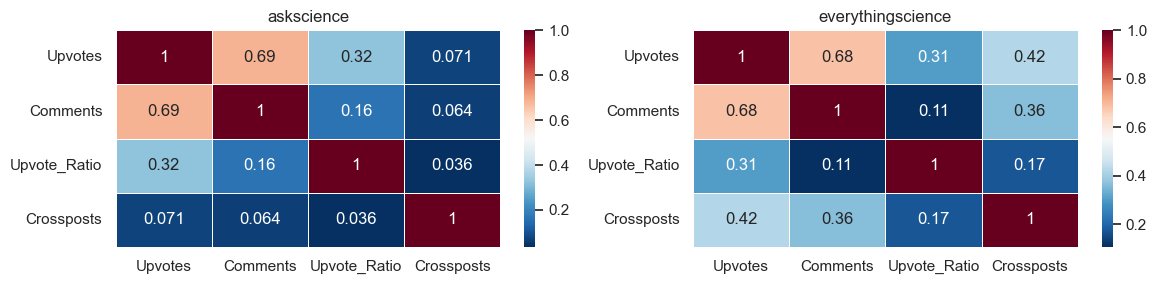

In [380]:
plt.rcParams["figure.figsize"] = [12.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
pearsoncorrelation1 = df_askscience.corr(method='pearson',numeric_only=True)
pearsoncorrelation2 = df_everythingscience.corr(method='pearson',numeric_only=True)
sns.heatmap(pearsoncorrelation1, xticklabels=pearsoncorrelation.columns, yticklabels=pearsoncorrelation.columns, cmap='RdBu_r', annot=True, ax=axes[0], linewidth=0.5)
sns.heatmap(pearsoncorrelation2, xticklabels=pearsoncorrelation.columns, yticklabels=pearsoncorrelation.columns, cmap='RdBu_r', annot=True, ax=axes[1], linewidth=0.5)
axes[0].set_title('askscience')
axes[1].set_title('everythingscience')

### PEARSON HEATMAP OBSERVATIONS
- Comments and upvotes have a high corelation for both subreddits
- Crossposts doesn't have any relationship with upvotes in case of askscience sub but have positive corelation with upvotes for everythingscience sub. That means crossposting content from askscience sub doesn't have much affect on upvotes or comments. Whereas crossposting content from everythingscience subreddit could lead to higher interaction meaning higher author productivity.

Text(0.5, 1.0, 'everythingscience')

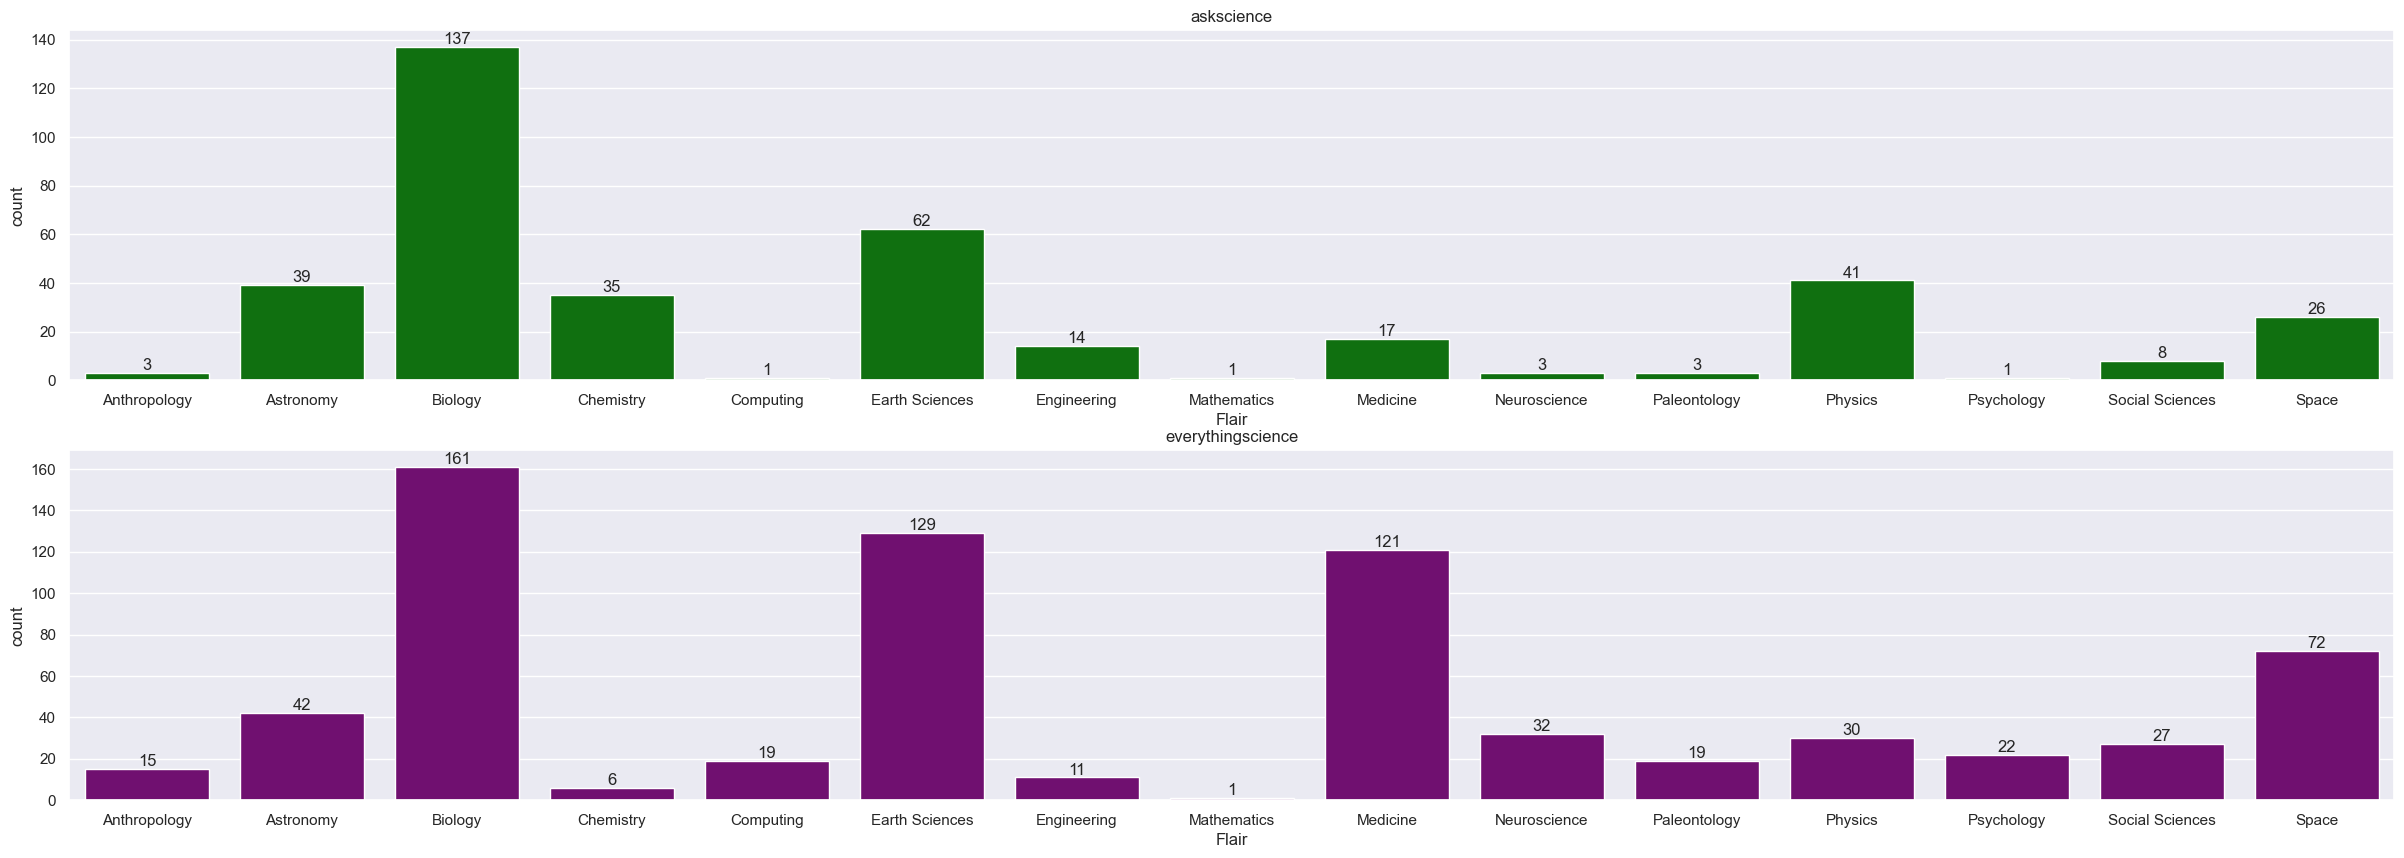

In [399]:
plt.rcParams["figure.figsize"] = [30.00, 10.00]
plt.rcParams["figure.autolayout"] = False
f, axes = plt.subplots(2, 1)
ax = sns.countplot(x = 'Flair', ax=axes[0], color="green", data = df_askscience.sort_values(by='Flair', ascending=True))
ay = sns.countplot(x = 'Flair', ax=axes[1], color="purple", data = df_everythingscience.sort_values(by='Flair', ascending=True))
for bars in ax.containers:
    ax.bar_label(bars)
for bars in ay.containers:
    ay.bar_label(bars)
axes[0].set_title('askscience')
axes[1].set_title('everythingscience')

### COUNTPLOT OBSERVATIONS
- askscience gets very few posts for anthropology, computing, mathematics, neuroscience, paleontology, psychology. This actually shows what interests askscience community has and which fields have lesser questions. These Flairs also don't get much questions from everythingscience community.
- There are a lot of questions from biology and earth sciences in both these communities.

Text(0.5, 1.0, 'everythingscience')

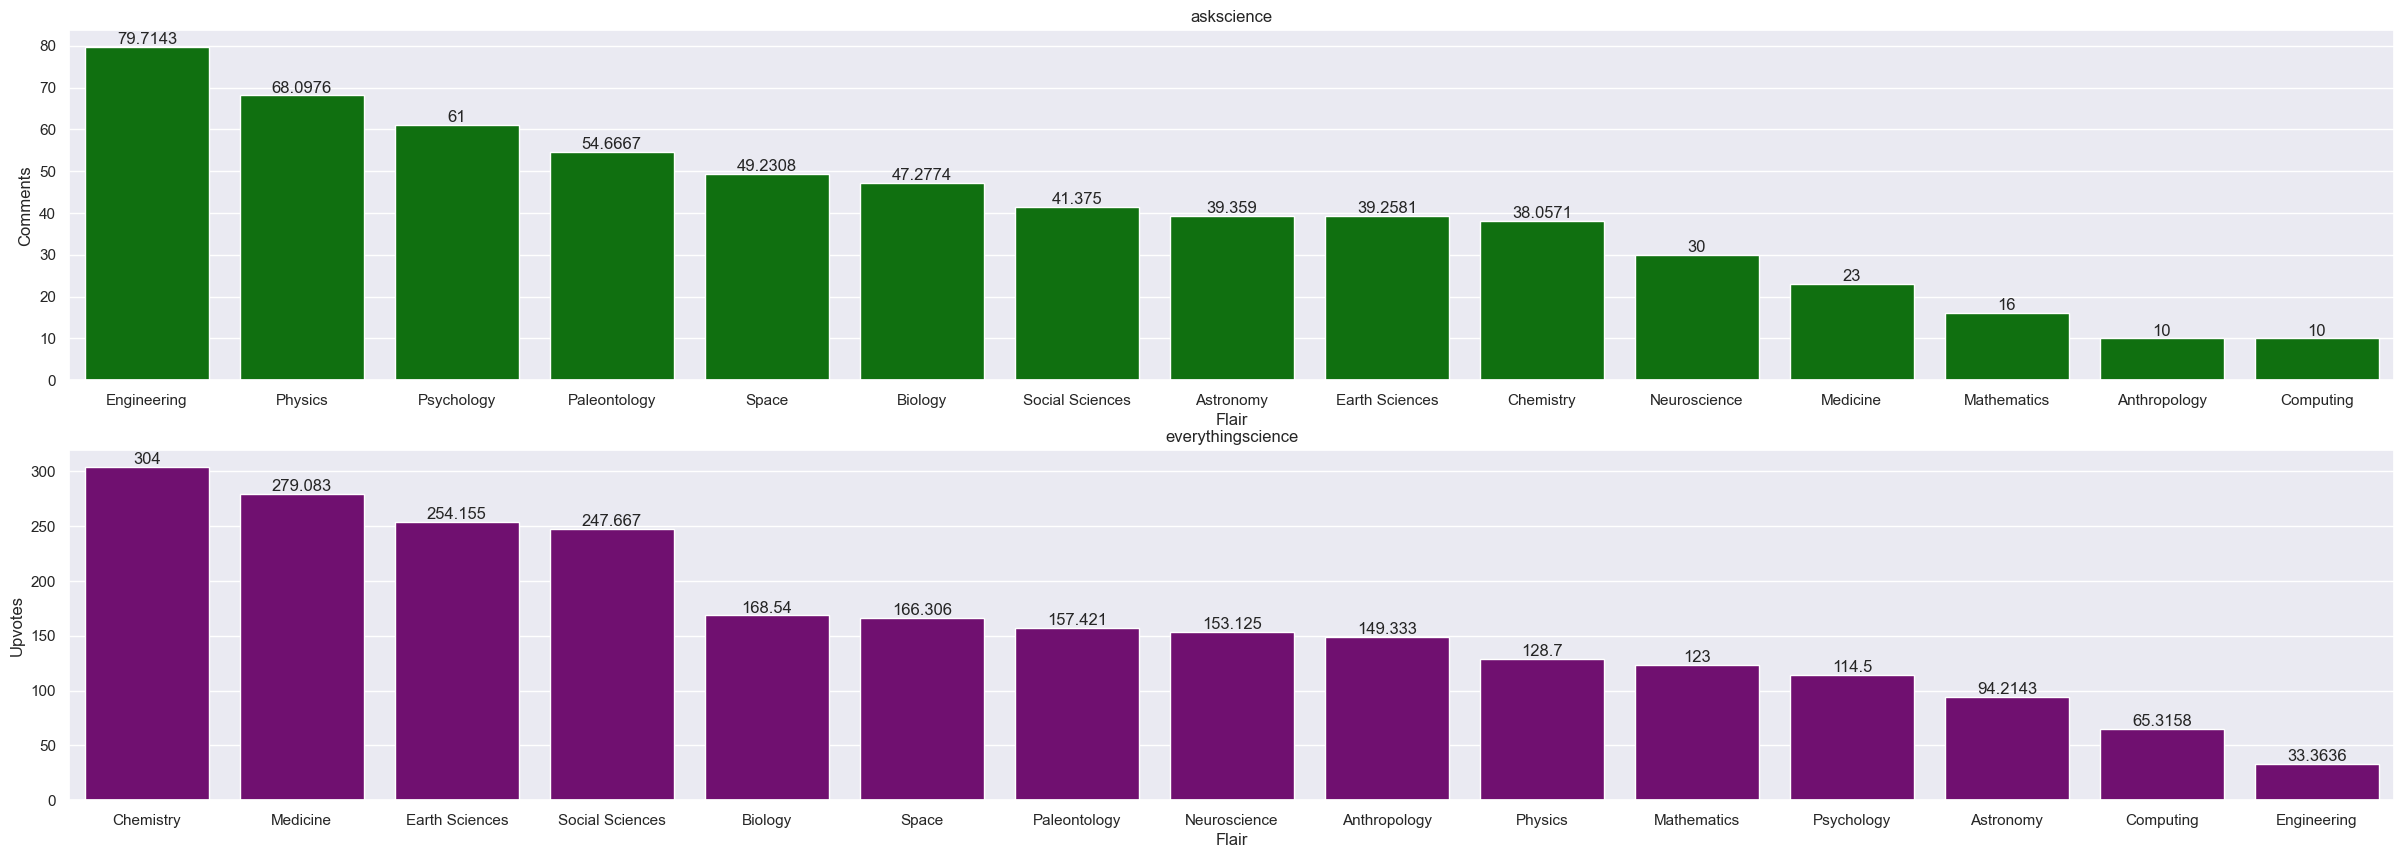

In [384]:
plt.rcParams["figure.figsize"] = [30.00, 10.00]
plt.rcParams["figure.autolayout"] = False
f, axes = plt.subplots(2, 1)
upvotes_askscience = df_askscience.groupby(['Flair'], as_index=False)['Comments'].mean().sort_values(by='Comments', ascending=False)
upvotes_everythingscience = df_everythingscience.groupby(['Flair'], as_index=False)['Upvotes'].mean().sort_values(by='Upvotes', ascending=False)
ax1 = sns.barplot(x = 'Flair',y= 'Comments',color="green", ax=axes[0], data = upvotes_askscience)
ax2 = sns.barplot(x = 'Flair',y= 'Upvotes',color="purple",ax=axes[1], data = upvotes_everythingscience)
for bars in ax1.containers:
    ax1.bar_label(bars)
for bars in ax2.containers:
    ax2.bar_label(bars)
axes[0].set_title('askscience')
axes[1].set_title('everythingscience')

### BARPLOT OBSERVATIONS
For askscience community I have plotted average comments that a post of a particular flair gets. Whereas for everythingscience subreddit I have used Upvotes as a metric to plot the same plot. Since mostly unique questions are asked in askscience, comments are a better parameter to understand contributor success but for everythingscience upvotes is better. This could also be observed from average comments and upvotes that both these communities get. askscience gets more comments on an average than everythingscience. Some observations from barplot are.
- In askscience, questions from Engineering gets more comments on an average. Interestingly Engineering is at the bottom in case of everythingscience. This could mean although users like discussing engineering related questions, news related to it doesn't garner much attention. 

Text(0.5, 1.0, 'everythingscience')

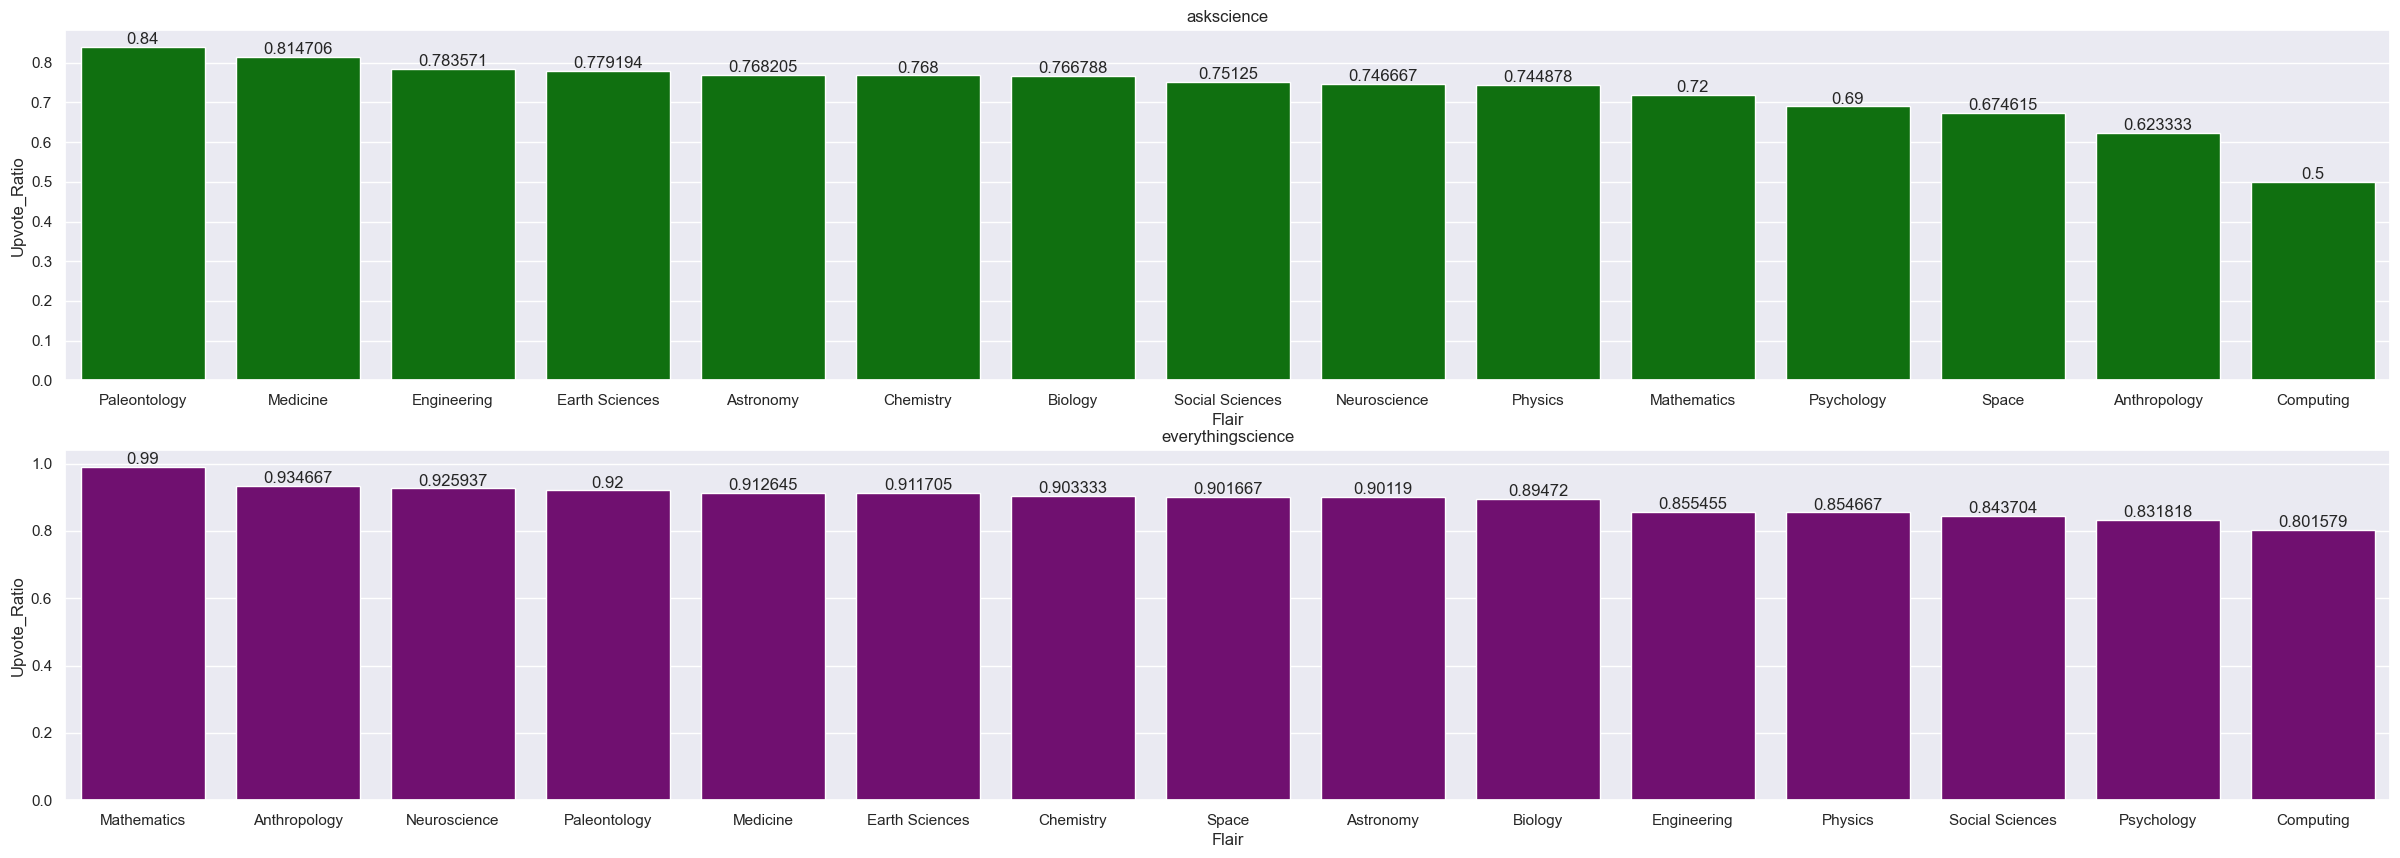

In [385]:
plt.rcParams["figure.figsize"] = [30.00, 10.00]
plt.rcParams["figure.autolayout"] = False
f, axes = plt.subplots(2, 1)
upvotes_ratio1 = df_askscience.groupby(['Flair'], as_index=False)['Upvote_Ratio'].mean().sort_values(by='Upvote_Ratio', ascending=False)
upvotes_ratio2 = df_everythingscience.groupby(['Flair'], as_index=False)['Upvote_Ratio'].mean().sort_values(by='Upvote_Ratio', ascending=False)
ax1 = sns.barplot(x = 'Flair', ax=axes[0],color="green", y= 'Upvote_Ratio' ,data = upvotes_ratio1)
ax2 = sns.barplot(x = 'Flair', ax=axes[1],color="purple", y= 'Upvote_Ratio' ,data = upvotes_ratio2)
for bars in ax1.containers:
    ax1.bar_label(bars)
for bars in ax2.containers:
    ax2.bar_label(bars)
axes[0].set_title('askscience')
axes[1].set_title('everythingscience')

### UPVOTE RATIO BARPLOT OBSERVATIONS
- Computing category gets most percentage of downvotes in both subreddits.
- In askscience subreddit questions related to space gets a lot of downvotes. Anthropology and computing have very few posts so they can be ignored.

Text(0.5, 1.0, 'everythingscience')

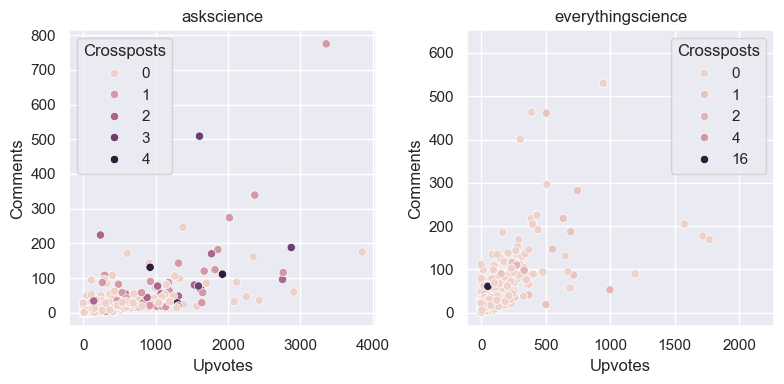

In [386]:
plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
sns.scatterplot(x='Upvotes',y='Comments', ax=axes[0], data=df_everythingscience, hue='Crossposts')
sns.scatterplot(x='Upvotes',y='Comments', ax=axes[1], data=df_askscience, hue='Crossposts')
axes[0].set_title('askscience')
axes[1].set_title('everythingscience')

### SCATTERPLOT OBSERVATIONS
- In everything science their is a single post with 16 crossposts, which is unusual. On searching for this post using its id on praw i found it to be a AMA posted by a highly qualified moderator of askscience subreddit https://www.reddit.com/r/askscience/comments/17648ht/askscience_ama_series_im_stanford_professor_dr/.

<Axes: xlabel='Comments', ylabel='Density'>

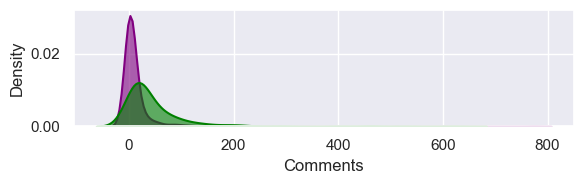

In [389]:
sns.set(rc={'figure.figsize':(6,2)})
sns.kdeplot(df_everythingscience['Comments'],color='purple', fill = True, alpha=0.6, linewidth=1.5 )
sns.kdeplot(data=df_askscience['Comments'], color='green', fill = True, alpha=0.6, linewidth=1.5 )

### KDEPLOT OBSERVATIONS
- Peak of askscience plot is located farther from everythingscience plot on x axis. It demonstrates that more comments come on askscience sub as compared with everythingscience sub.

<Axes: xlabel='Upvote_Ratio', ylabel='Upvotes'>

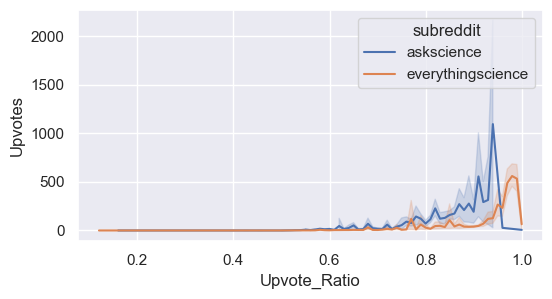

In [379]:
concatenated = pd.concat([df_askscience.assign(subreddit='askscience'), df_everythingscience.assign(subreddit='everythingscience')])
sns.set(rc={'figure.figsize':(6,3)})
sns.lineplot(x="Upvote_Ratio", y="Upvotes", hue = 'subreddit', data=concatenated) 

### LINEPLOT OBSERVATIONS
- Peak of everythingscience subreddit is located ahead of askscience sub on x axis. It shows that higher upvote ratio is required for everythingscience than askscience in order to get more visibility in term of upvotes.

Text(0.5, 1.0, 'everythingscience')

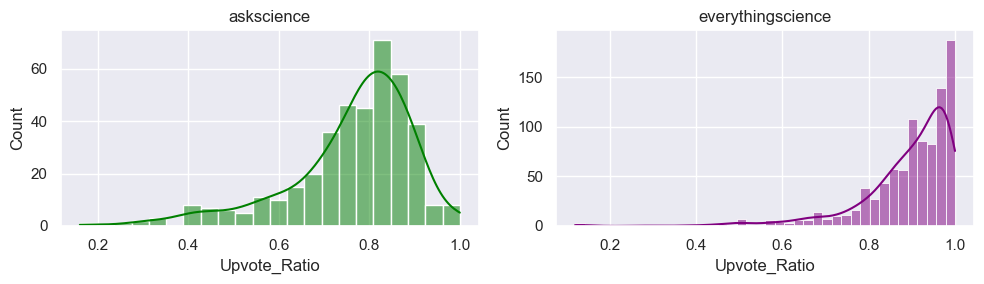

In [390]:
plt.rcParams["figure.figsize"] = [10.00, 3.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1,2)
sns.histplot(data=df_askscience, kde=True, ax=axes[0], color="green", x="Upvote_Ratio")
sns.histplot(data=df_everythingscience, kde=True, ax=axes[1], color="purple", x="Upvote_Ratio")


### HISTOGRAM OBSERVATIONS
- More objectivity is required for contributor success on everythingscience subreddit than askscience subreddit. Higher upvote ratio means that most of the people agree with the content of the post. Raising unfamiliar or new questions often leading to more discussions could increase contributor success on askscience subreddit.

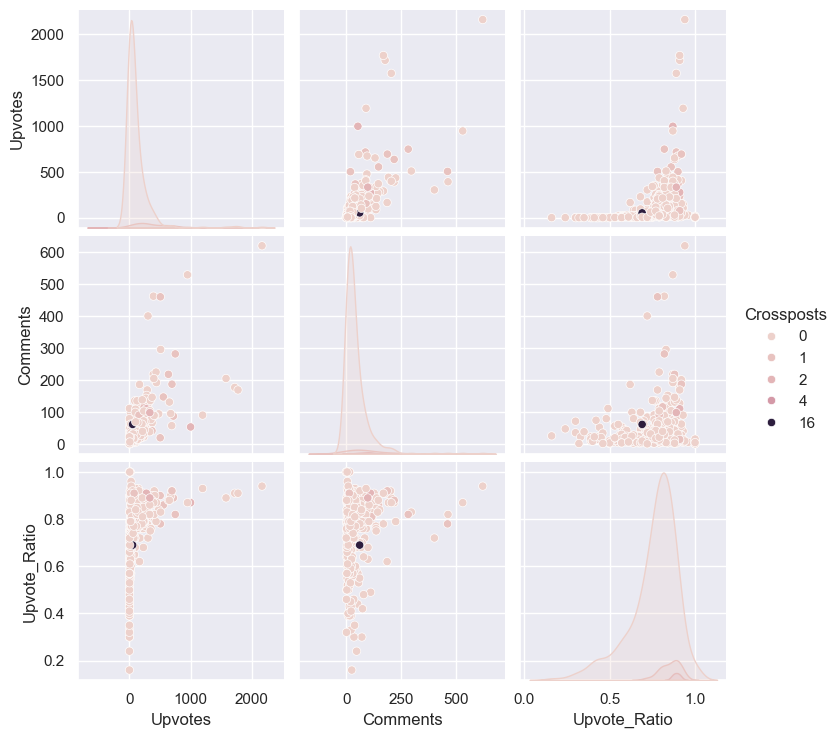

In [393]:
sns.set(rc={'figure.figsize':(15,10)})
sns.pairplot(df_askscience,diag_kind="kde", hue = 'Crossposts')

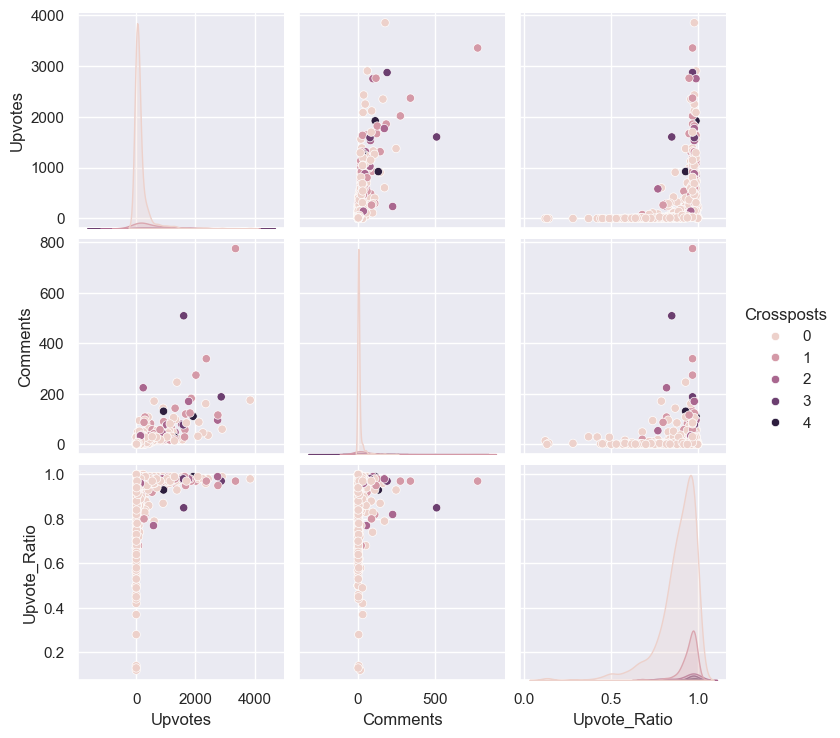

In [169]:
sns.pairplot(df_everythingscience, hue = 'Crossposts')

<Axes: xlabel='Flair', ylabel='Upvotes'>

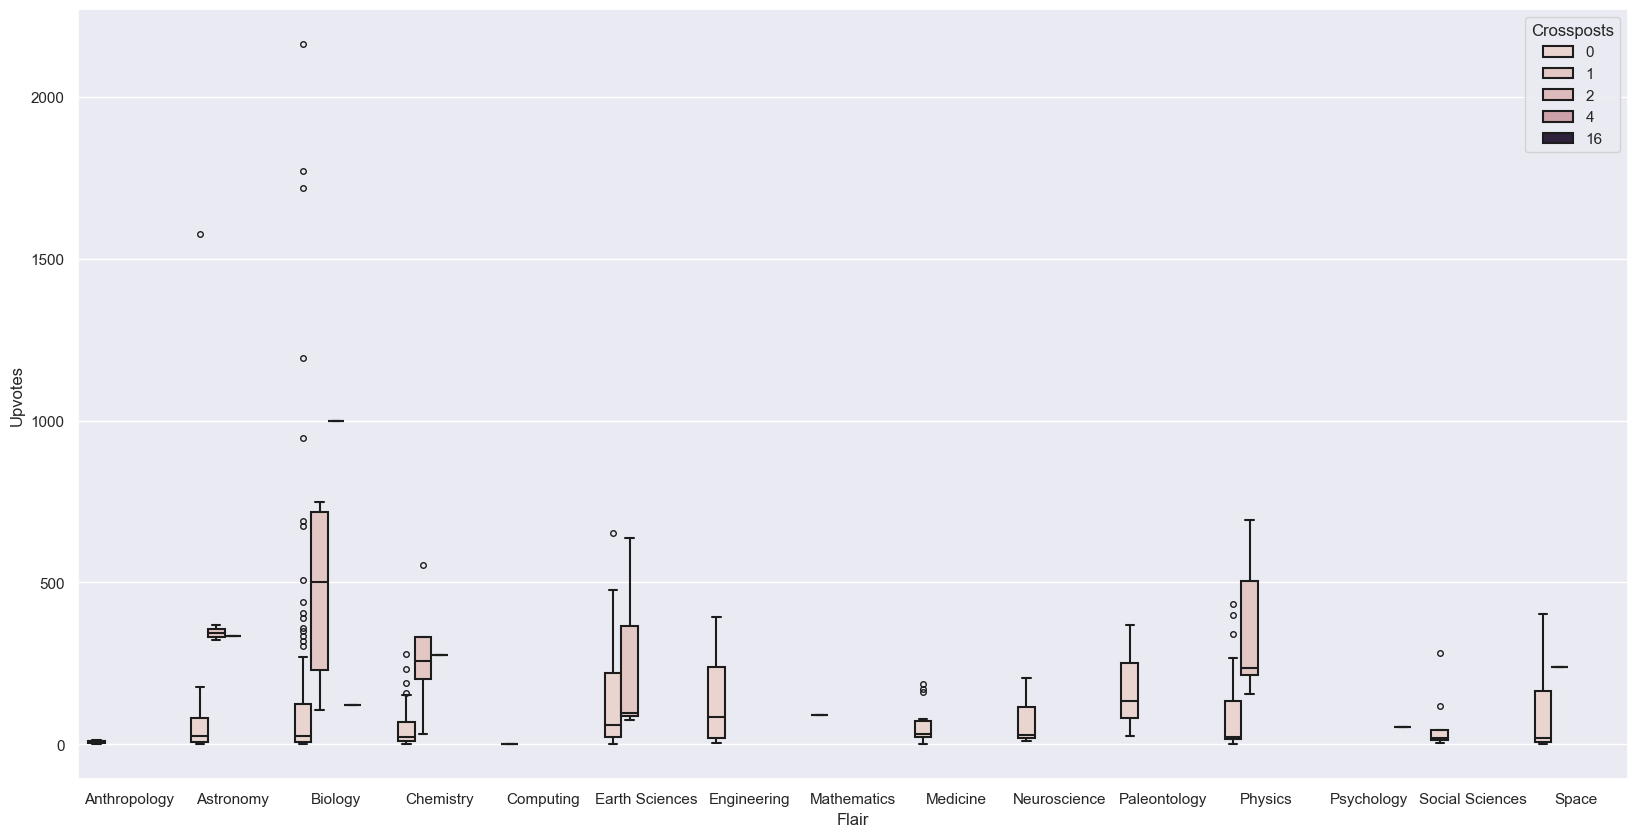

In [400]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x="Flair", y="Upvotes", hue="Crossposts",linewidth=1.5, fliersize=4, data=df_askscience.sort_values(by='Flair', ascending=True))

<Axes: xlabel='Flair', ylabel='Comments'>

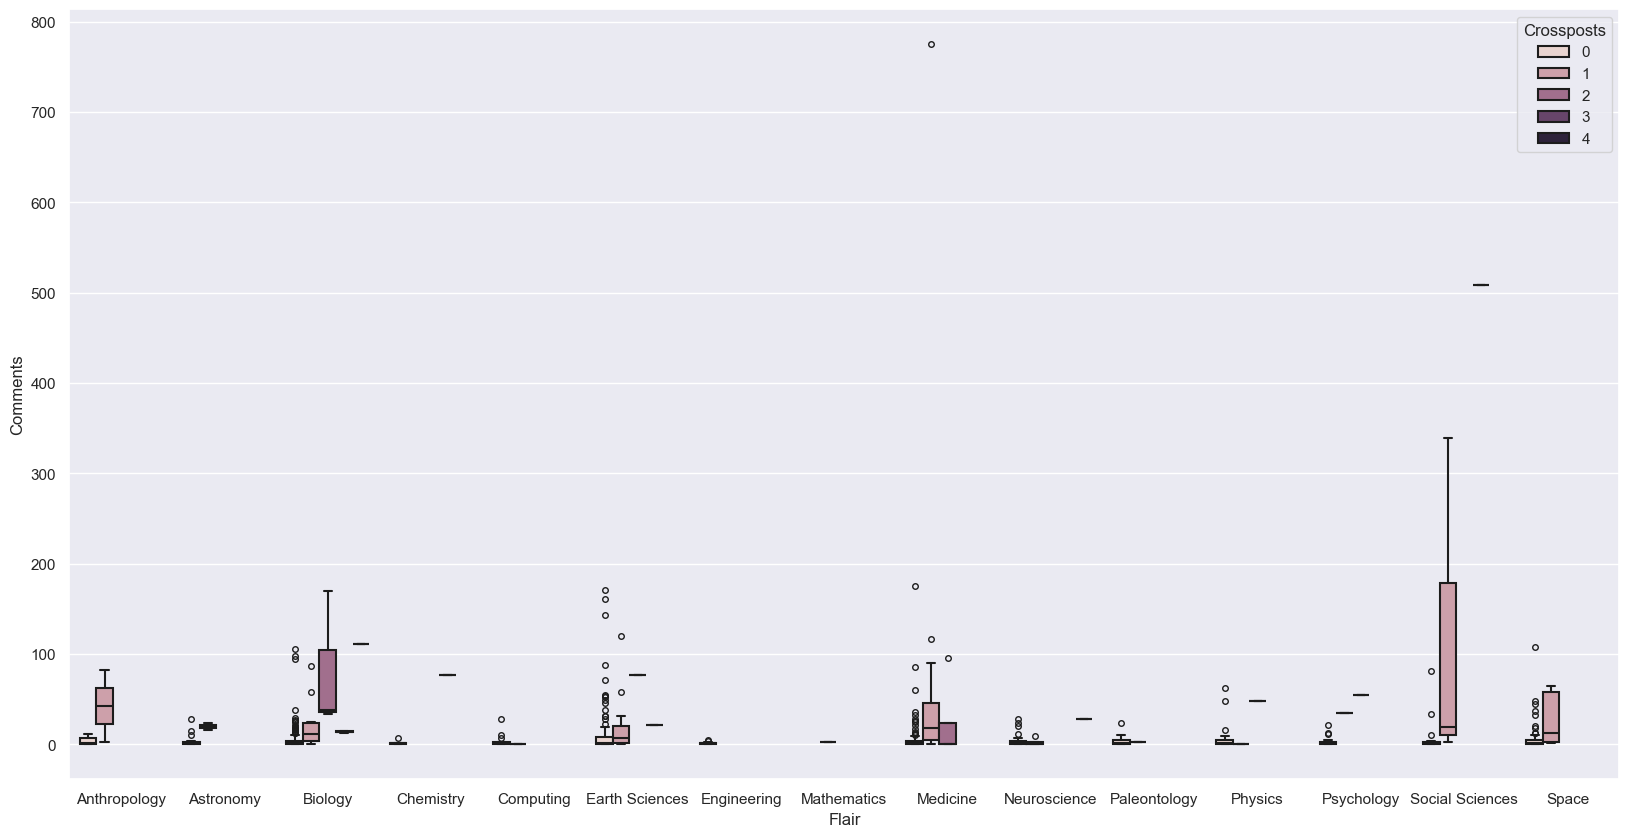

In [401]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(x="Flair", y="Comments", hue="Crossposts",linewidth=1.5, fliersize=4, data=df_everythingscience.sort_values(by='Flair', ascending=True))